# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [70]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   66.4  83.9     65.0     7.5              68.2          63.0
1   44.1  84.8     71.8    54.5              70.5          74.1
3   67.7  18.8     46.6    88.0              40.7          74.8


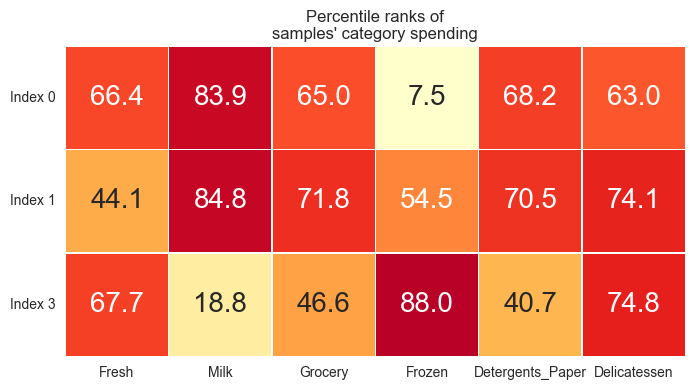

In [2]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,1,3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, annot_kws={'size':20}, linewidth=.1, vmax=99, 
            fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.title('Percentile ranks of\nsamples\' category spending')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
 	 	 	 	 	
mean: Fresh(12000) Milk(5796) Grocery(7951) Frozen(3071) Detergents_Paper(2881) Delicatessen(1524)  
0th : Fresh(12669) Milk(9656) Grocery(7561) Frozen(214) Detergents_Paper(2674) Delicatessen(1338)  
(avg fresh, grocery, detergents, delicatessen) (below avg frozen) (above avg milk) Coffee shop with maybe sandwiches and snacks.  

mean: Fresh(12000) Milk(5796) Grocery(7951) Frozen(3071) Detergents_Paper(2881) Delicatessen(1524)  
1st : Fresh(7057) Milk(9810) Grocery(9568) Frozen(1762) Detergents_Paper(3293) Delicatessen(1776)  
(avg detergents, delicatessen)(below avg fresh)(above avg milk, grocery)Seems like they cook and serve and their menu includes milky deserts and drinks. I would say a breakfast oriented coffee shop.  

mean: Fresh(12000) Milk(5796) Grocery(7951) Frozen(3071) Detergents_Paper(2881) Delicatessen(1524)  
2nd : Fresh(13265) Milk(1196) Grocery(4221) Frozen(6404) Detergents_Paper(507) Delicatessen(1788)  
(avg delicatessen)(below avg milk, grocery, detergents)(above avg fresh, frozen) sandwich and ice-cream truck.  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [3]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

feature_list = list(data.columns[:])
d_feat_score = {}
for feature in feature_list:
    d_feat_score[feature]=0

# for feature, score in d_feat_score.items():
#     print feature + "'s prediction score: " + str(score)
    
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
    
for dropped_feature in feature_list:
    y_all = data[dropped_feature]
    X_all = data.drop([dropped_feature], axis=1)
        
    for random_state_val in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=random_state_val)
        regressor = DecisionTreeRegressor(random_state=random_state_val)
        regressor.fit(X_train, y_train)
        
        score = regressor.score(X_test, y_test)
        d_feat_score[dropped_feature]+=score/100.0
        
for feature, score in d_feat_score.items():
    print feature + "'s prediction score: " + str(score)

Grocery's prediction score: 0.666235862937
Frozen's prediction score: -1.35208588345
Delicatessen's prediction score: -2.23333452417
Detergents_Paper's prediction score: 0.686152510286
Fresh's prediction score: -0.649747447806
Milk's prediction score: 0.14234626599


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict every single feature by using other remaning features. **Grocery** and **Detergents_Paper** can be predicted by using the other features. According to the sklearn documentation, a constant model that always predicts the expected value of y -- as if it discards the input features-, would get a R^2 score of 0.0. Based on R^2 prediction score of Grocery->0.67 and Detergents_Paper->0.69, we can claim that they can be represented by other features, so we can drop them to find the most compact representation.

This is not the case for the Delicatessen, Frozen and Fresh. Milk can slightly be predicted based on the other features, but if we remove Milk, training accuracy may reduce as we might lose considerable amount of information if we drop the Milk feature.

Therefore, I think we can discard Grocery or Detergentens_Paper features as they are already represented by the other features, so wouldn't contribute to the training performance even may reduce if we don't drop them.

Correleation table blow also shows the relationship among all of the features. Degergents_Paper and Grocery has a correlation of 0.93 which is pretty strong. Both are mildly correlated with Milk too.

In [11]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

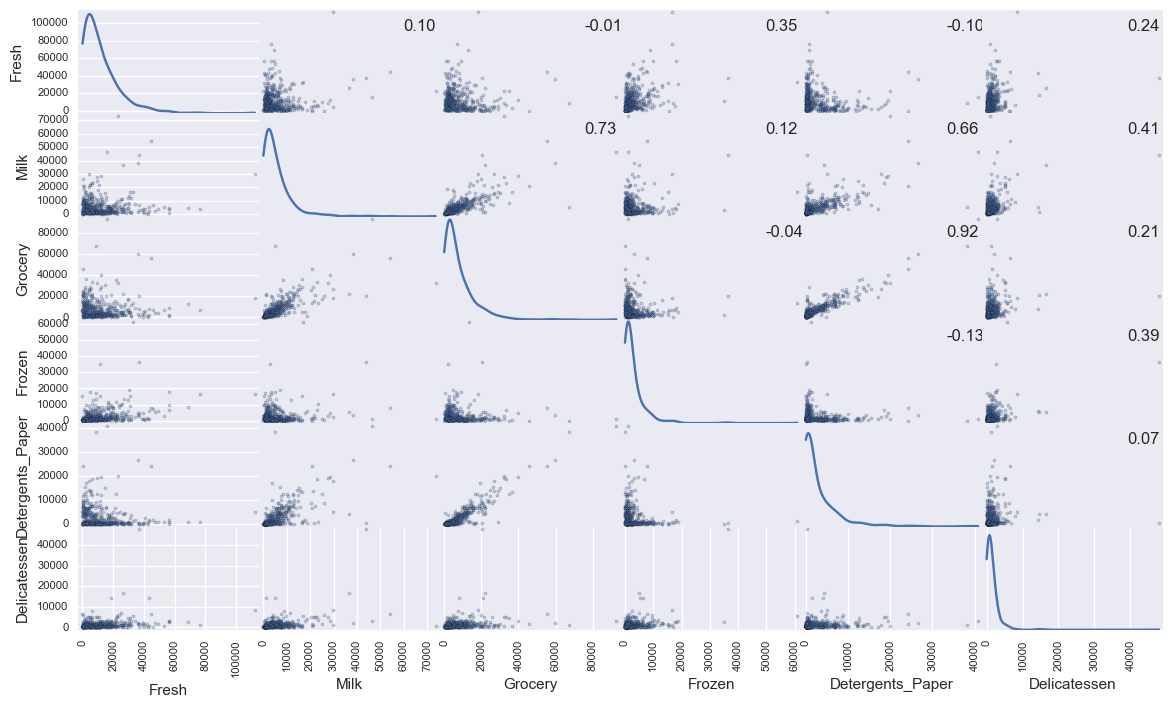

In [16]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Reformat data.corr() for plotting
corr = data.corr().as_matrix()

# Plot scatter matrix with correlations
for i,j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.2f"%corr[i,j], (0.8,0.8), xycoords='axes fraction')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Grocery and Detergents_Paper have almost like a linear relationship. All of the features has a normal distribution around a peak value. Frozen seems to have a smaller variance than other features, and Fresh has a larger varience compared to other features. All of the features have outliers that goes way beyond the deviation of the distribution. Therefore, they all demonstrate postive skewness as their mean is on the right side of the mode. To reduce the skewness, we can normalize the features which would yield in a more gaussian like distribution with considerably less skewness. In other words, we could eliminate the outlier data points which wouldn't contribute to the training much.

It seems Grocery and Detergents_Paper have a linear relationship. Besides, Milk feature demonstrates a linear-like relationship with Grocery and Detergents_Paper. Let's see how much of Detergents_Paper or Grocer feature can be reconstructed with Milk and Grocery or Detergents_Paper. We can compare the obtained R^2 score with the previous R^2 score to give the final decision about which feature to drop.

In [17]:
def CalculateRScore(X, Y):
    r_score = 0
    for random_state_val in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state_val)
        regressor = DecisionTreeRegressor(random_state=random_state_val)
        regressor.fit(X_train, y_train)
        r_score += regressor.score(X_test, y_test)/100.0
        
    return r_score

y_all_d = data['Detergents_Paper']
X_all_d = data[['Milk', 'Grocery']]

y_all_g = data['Grocery']
X_all_g = data[['Milk', 'Detergents_Paper']]


print "Detergents_Paper's prediction score: " + str(CalculateRScore(X_all_d, y_all_d))
print "Grocery's prediction score: " + str(CalculateRScore(X_all_g, y_all_g))

Detergents_Paper's prediction score: 0.657911508923
Grocery's prediction score: 0.702660031618


As it turns out Milk and Detergents_Paper can reconstruct Grocery with an R^2 score of 0.70. This is even higher than predicting Grocery by other 5 features with an R^2 score of 0.67. This shows that in fact Grocery is very much correlated with Milk and Detergents_Paper, and not with Fresh, Frozen and Delicatessen.

Similarly, Milk and Grocery can reconstruct Detergents_Paper with and R^2 of 0.66. This is almost equal to predicting Detergents_Paper via other 5 features. In that case R^2 score is 0.69. This shows that in fact Detergents_Paper is very much correlated with Milk and Grocery, and not with Fresh, Frozen and Delicatessen.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

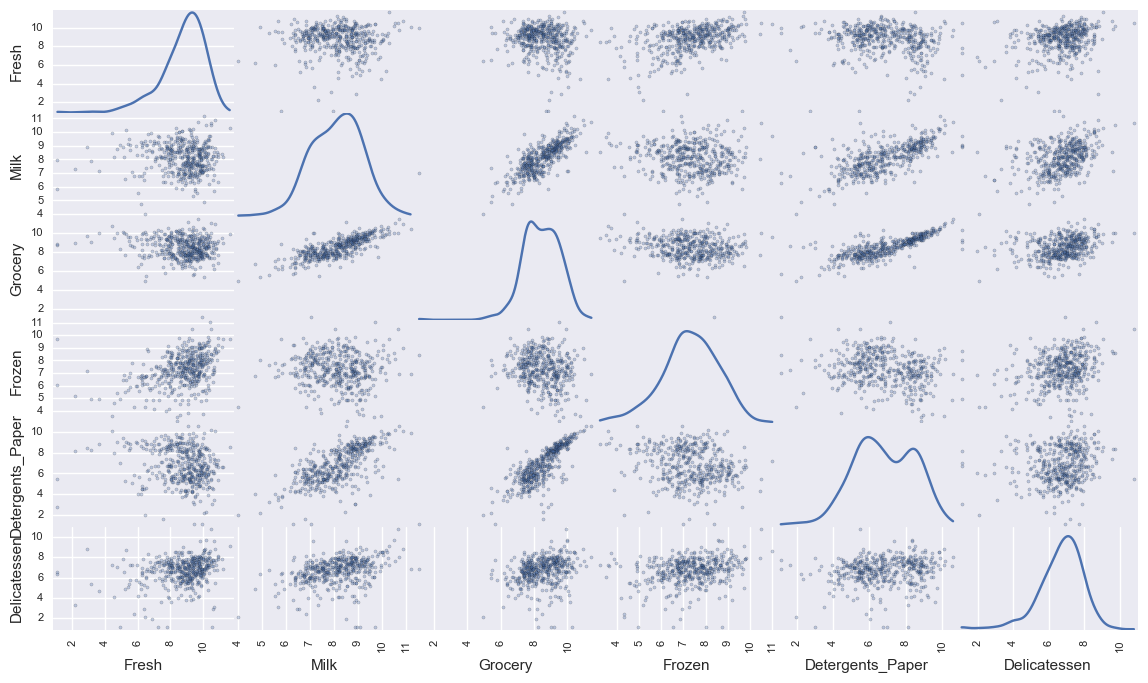

In [18]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [19]:
# Display the log-transformed sample data
display(samples)
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [20]:
# For each feature find the data points with extreme high or low values
outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers +=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values.tolist()
    
# OPTIONAL: Select the indices for data points you wish to remove
print outliers
print "number of outliers with repeating indices: " + str(len(outliers))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[65L, 66L, 81L, 95L, 96L, 128L, 171L, 193L, 218L, 304L, 305L, 338L, 353L, 355L, 357L, 412L, 86L, 98L, 154L, 356L, 75L, 154L, 38L, 57L, 65L, 145L, 175L, 264L, 325L, 420L, 429L, 439L, 75L, 161L, 66L, 109L, 128L, 137L, 142L, 154L, 183L, 184L, 187L, 203L, 233L, 285L, 289L, 343L]
number of outliers with repeating indices: 48


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Let's first see which indices marked as outliers how many times.

In [22]:
id2cnt = {}
for outlier in outliers:
    if not outlier in id2cnt:
        id2cnt[outlier] = 1
    else:
        id2cnt[outlier] += 1
    
# for key in id2cnt.keys():
#     print "id: " + str(key) + "->" + str(id2cnt[key])
    
import operator
sorted_id2cnt = sorted(id2cnt.items(), key=operator.itemgetter(1), reverse=True)
print sorted_id2cnt
removed_outliers = []
for key, value in sorted_id2cnt:
    #only remove the outliers that are repeated more than once
    if value <=1:
        break
    print str(key) + "->" + str(value)    
    removed_outliers.append(key)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[removed_outliers]).reset_index(drop = True)

[(154L, 3), (128L, 2), (65L, 2), (66L, 2), (75L, 2), (193L, 1), (264L, 1), (137L, 1), (142L, 1), (145L, 1), (412L, 1), (285L, 1), (161L, 1), (420L, 1), (38L, 1), (171L, 1), (429L, 1), (175L, 1), (304L, 1), (305L, 1), (439L, 1), (184L, 1), (57L, 1), (187L, 1), (203L, 1), (325L, 1), (289L, 1), (81L, 1), (338L, 1), (86L, 1), (343L, 1), (218L, 1), (95L, 1), (96L, 1), (353L, 1), (98L, 1), (355L, 1), (356L, 1), (357L, 1), (233L, 1), (109L, 1), (183L, 1)]
154->3
128->2
65->2
66->2
75->2


Data point 154 is an outlier for 3 features. This seems to be noise for this dataset. Similarly data points, 128, 65, 66, 75 are outliers for 2 features. These can be eliminated too.

Being Tukey outliers in multiple dimensions can effect the classification performance considerably. In the upcoming sections, we will choose our classifier as KMeans or GMM. Both of the classifiers, especially the KMeans, are too susceptible towards the outliers and noisy samples as they consider the spatial distance in the sample space as the optimization factor to move the decision boundary to get the best classification result. Therefore, samples that are Tukey outliers in multiple dimensions need to be removed from the dataset.

However, other potential Tukey outlier points that are outliers only in one dimension might still be useful for this learning task. I think we can give the final decision based on the number of data points we have and the number of outliers detected. 

We have in total 48 outlier points including the repetitions, 42 distinct points. We have in total 440 points. Removing all of the 42 points would be losing the 10% of the whole dataset which seems to be too much to give up for. Removing those points that is an outlier more than one feature might be losing only 5 points which is only 1.1% of the dataset which seems like a reasonable filtering.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

    Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 -0.1675  0.4014   0.4381 -0.1782            0.7514        0.1499
1  0.6859  0.1672   0.0707  0.5005            0.0424        0.4941
2 -0.6774  0.0402  -0.0195  0.3150           -0.2117        0.6286
3 -0.2043  0.0128   0.0557  0.7854            0.2096       -0.5423
4  0.0026 -0.7192  -0.3554  0.0331            0.5582        0.2092
5 -0.0292  0.5402  -0.8205 -0.0205            0.1824       -0.0197


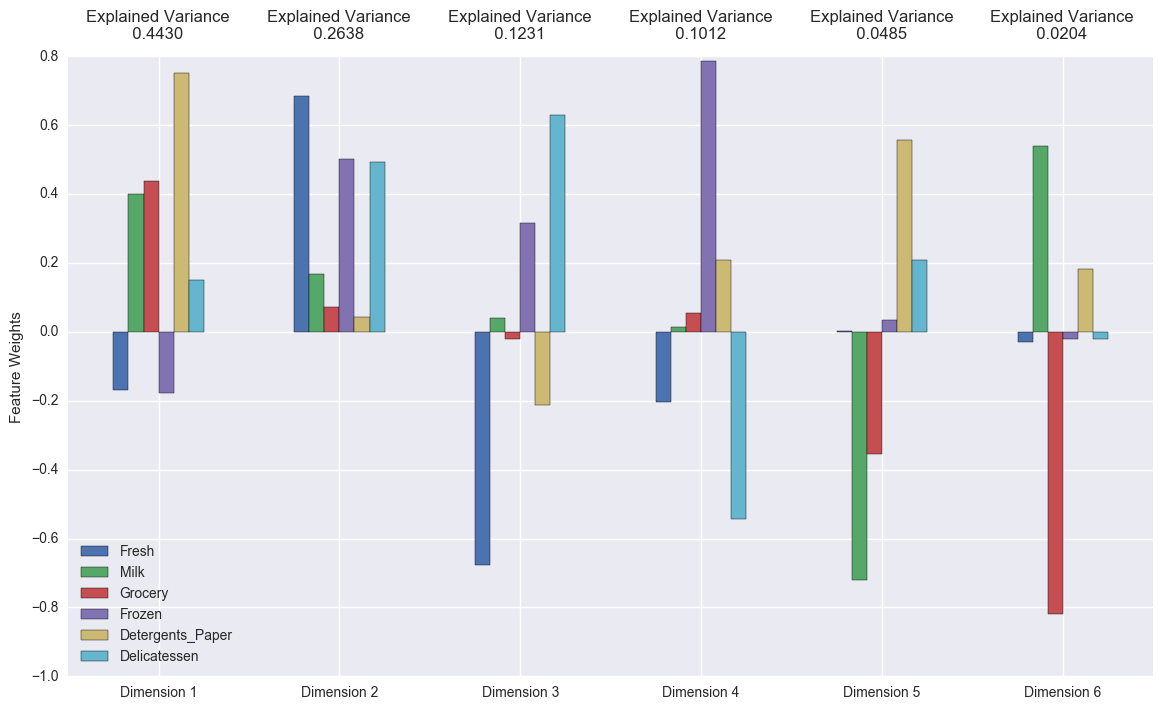

In [28]:
from sklearn.decomposition import PCA

# print "Extracting the top %d eigenfaces from %d faces" % (n_components, good_data.shape[0])

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
n_components = 6
pca = PCA(n_components=n_components).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
print components
# print pca.components_
# print pca.explained_variance_ratio_
# print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** First and second pc have a cumulative explained variance of 0.70, first four pc is 0.93.

1st pc: Detergents_Paper(0.75), Grocery(0.43) and Milk(0.40)
2nd pc: Fresh(0.69), Frozen(0.5) and Delicatessen(0.49)
3rd pc: Delicatessen(0.63) and Frozen(0.31)
4th pc: Frozen(0.78)

1st pc can be viewed as a measure of cooking and serving. It can also be a measure of how many people can be hosted in that place. For example, it can differentiate if a given customer is a large restaruant or not.

2nd pc can be a measure of how coffee-shop a place is like. Not much cooking.

3rd pc can be a measure of small buffet or a deli place. It also shows that high value in this component may indicate increase in high deli concentrated consumption and very little fresh consumption. Therefore a customer with the high value in 3rd component may indicate it might be a deli-like place.

4th pc is like a seasonal food truck or cart. It seems it represents a category of a customer which has excessive need for frozen type of products but little deli like products. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [29]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7580,-0.0097,-0.9590,-1.6824,-0.2680,0.3891
1,1.7887,0.8123,0.2315,-0.0036,-0.1194,0.2106
2,-1.1553,1.4052,0.5422,0.4127,0.6865,-0.6409


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

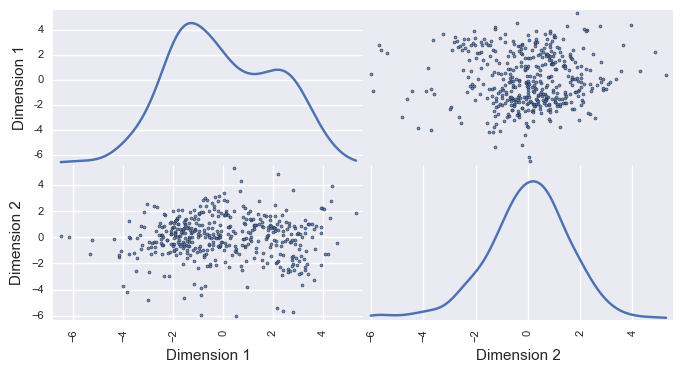

In [32]:
# TODO: Apply PCA by fitting the good data with only two dimensions
n_components = 2
pca = PCA(n_components=n_components).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [33]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7580,-0.0097
1,1.7887,0.8123
2,-1.1553,1.4052


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

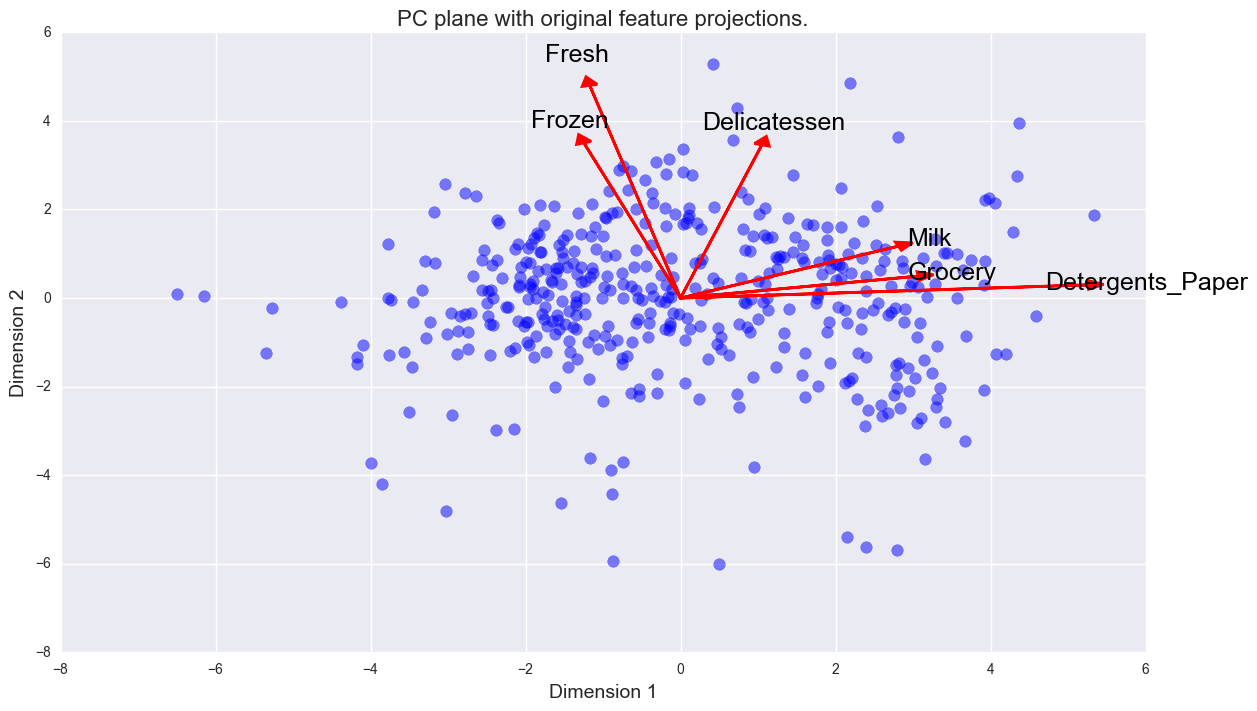

In [34]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:** Detergents_Paper, Milk and Grocery are correlated with the first principal component. Frozen and Fresh are correlated with the second component. These results agree with the results I obtained earlier.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means algorithm is very basic and it helps to assign a class to every single data instance. GMM on the other hand a bit more complex in the sense that it also captures for every data instance how good of a cluster/confident membership is. While KMeans is doing a hard clustering, GMM is doing soft which seems to be more informative. I would use GMM because there doesn't seem to be clear seperations between the customer segments. GMM should be a better choice as it can model how likely a point belongs to different clusters. I would expect K-Means to return a result faster than GMM as GMM tries to model more parameters than KMeans.

Training the reduced_data with GMM took 0.0360 seconds, whereas took 0.0300 seconds with KMeans. KMeans is slightly faster than GMM in training.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
n_components = 2
pca_w_outliers = PCA(n_components=n_components).fit(log_data)
reduced_data_w_outliers = pca_w_outliers.transform(log_data)
reduced_data_w_outliers = pd.DataFrame(reduced_data_w_outliers, columns = ['Dimension 1', 'Dimension 2'])

In [36]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from time import time

def CalculateClusteringScore(input_data, num_components):
    for n_components in num_components:
        clusterer = GMM(n_components=n_components, covariance_type='full', n_iter=20, random_state=0)
        start = time()
        clusterer.fit(input_data)
        end = time()
        print "GMM Training in {:.4f} seconds.".format(end - start)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(input_data)

        # TODO: Find the cluster centers
        centers = clusterer.means_

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(input_data, preds)

        print "n_components: " + str(n_components) + " -> GMM score: " + str(score)

        kmeans = KMeans(n_clusters=n_components, random_state=0)
        start = time()
        kmeans.fit(input_data)
        end = time()
        print "KMs Training in {:.4f} seconds.".format(end - start)

        preds_kmeans = kmeans.predict(input_data)
        centers_kmeans = kmeans.cluster_centers_
        sample_preds_kmeans = kmeans.predict(pca_samples)
        score_kmeans = silhouette_score(input_data, preds_kmeans)
        print "n_components: " + str(n_components) + " -> KMs score: " + str(score_kmeans)
        
        return preds, centers

l_n_components = []
# l_n_components = range(2, 7)
l_n_components.append(2)
preds, centers = CalculateClusteringScore(reduced_data, l_n_components)
# CalculateClusteringScore(reduced_data_w_outliers, l_n_components)

GMM Training in 0.0370 seconds.
n_components: 2 -> GMM score: 0.41174985628
KMs Training in 0.0280 seconds.
n_components: 2 -> KMs score: 0.426281015469


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** We have the best silhoouette score when the cluster number is 2.

GMM Training in 0.0360 seconds.  
n_components: 2 -> GMM score: 0.41174985628  
KMs Training in 0.0340 seconds.  
n_components: 2 -> KMs score: 0.426281015469  
GMM Training in 0.0800 seconds.  
n_components: 3 -> GMM score: 0.394966458138  
KMs Training in 0.0430 seconds.  
n_components: 3 -> KMs score: 0.39689092645  
GMM Training in 0.0830 seconds.  
n_components: 4 -> GMM score: 0.291670780284  
KMs Training in 0.0440 seconds.  
n_components: 4 -> KMs score: 0.332009582682  
GMM Training in 0.1170 seconds.  
n_components: 5 -> GMM score: 0.217076190847  
KMs Training in 0.0660 seconds.  
n_components: 5 -> KMs score: 0.350990778931  
GMM Training in 0.1150 seconds.  
n_components: 6 -> GMM score: 0.295416013004  
KMs Training in 0.0800 seconds.  
n_components: 6 -> KMs score: 0.366608987343

I also wanted to see the effect of removing outliers in the number of clusters. Here are the list of scores with KMeans and GMM for different number of clusters. It seems number of clusters doesn't change with or without the outliers.
GMM Training in 0.0300 seconds.  
n_components: 2 -> GMM score: 0.398029003568  
KMs Training in 0.0320 seconds.  
n_components: 2 -> KMs score: 0.419166083203  
GMM Training in 0.0630 seconds.  
n_components: 3 -> GMM score: 0.386281842706  
KMs Training in 0.0430 seconds.  
n_components: 3 -> KMs score: 0.393678525808  
GMM Training in 0.0800 seconds.  
n_components: 4 -> GMM score: 0.350543009547  
KMs Training in 0.0520 seconds.  
n_components: 4 -> KMs score: 0.330229563532  
GMM Training in 0.1310 seconds.  
n_components: 5 -> GMM score: 0.238635883079  
KMs Training in 0.0810 seconds.  
n_components: 5 -> KMs score: 0.343875059474  
GMM Training in 0.0910 seconds.  
n_components: 6 -> GMM score: 0.295425193005  
KMs Training in 0.0550 seconds.  
n_components: 6 -> KMs score: 0.360170736113

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

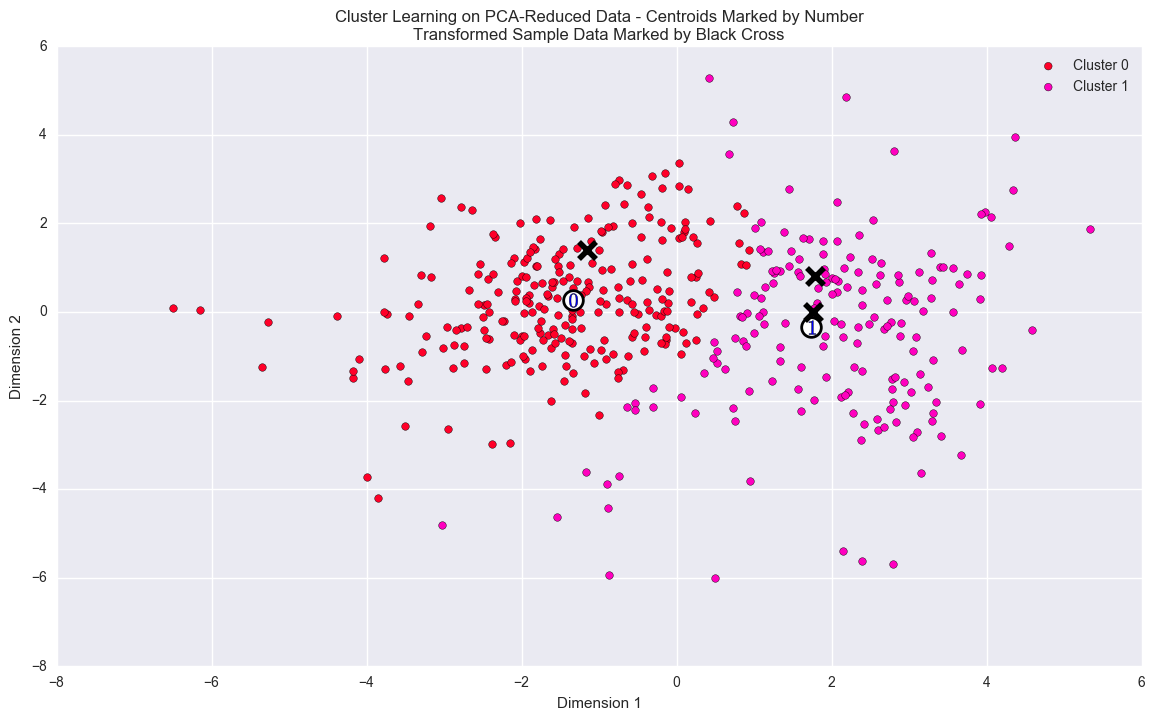

In [37]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [38]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  

In [39]:
display(data.describe())
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


A customer of cluster 0 => (avg Fresh, Frozen) (below avg Milk, Grocery, Detergents_Paper, Delicatessen)  
A customer of cluster 1 => (avg Detergents_Paper)(below avg Fresh, Delicatessen, Frozen) (above avg Milk, Grocery)

As we can see, they are quite different types of customers. Almost completely opposite. If the segment 0 type is like an ice-cream truck, segment one type of customer is more like a cafe/restaurant.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [132]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [40]:
display(samples)
display(true_centers)
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:** Yes. My eariler guess was cofee shop, coffee shop, ice-cream truck, respectively. Now, When I check the distance between the features of each samples and the cluster centers, I infer the same result. This is also inline with the predicted cluster ids.

**Update:**  
sample point 0: (avg Grocery)(above-avg Milk)(avg Detergents_Paper)  
sample point 1: (above-avg Grocery)(above-avg Milk)(below-avg Detergents_Paper)  
sample point 2: (below-avg Grocery)(below-avg Milk)(below-avg Detergents_Paper)

sample point 2
segment-0: (below-avg Grocery)(below-avg Milk)(below-avg Detergents_Paper)  
sample point 0  
sample point 1
segment-1: (above-avg Grocery)(avg Milk)(avg Detergents_Paper)  

Based on this discretization and sorting above we can claim that sample point 2 is definitely in segment 0. sample point 0 and 1 are close the segment 1 which is inline with the earlier predictions.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
First, I would pick the customers that are closest to the cluster centers. I would pick 20 (10% of each cluster) customers from each cluster. I would ask them or help them try 3-day a week delivery for all of those 40 customers. Based on their reactions, I would understand how likely it is acceptable for each group.  

As a second step, I would pick 20(other 10% from each cluster) customers from each cluster that are almost equally distant to the cluster centers. Those are the customers that are closer to the decision boundary. I would ask them or help them try 3-day a week delivery for those 40 customers.  

If I obtain consistent intra-class results based on these two tests then I would switch to the 3-day a week delivery for that particular class. In other words if both of the tests yield for example: "customers from the cluster 0 accepts this new delivery" then I would switch to the this new delivery method for those people and I would keep asking the remaining customers while slowly migrating to this new delivery system for the customers from this cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Based on the provided estimates for anticipated annual spending pf each category, our trained model can infer the customer segment of these new customers.

From the A/B testing results we start to collect data regarding the preferences of the customers for the new delivery style. Therefore, we can train a supervised learner which takes the spendings and customer segment as input and outputs the customer-preferred-delivery-method as the target label.

Therefore, we can predict which delivery method new customers prefer. The more A/B tests we conduct, the more supervised data we will gather which will result in more accurate estimations for the new customer's delivery preference.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

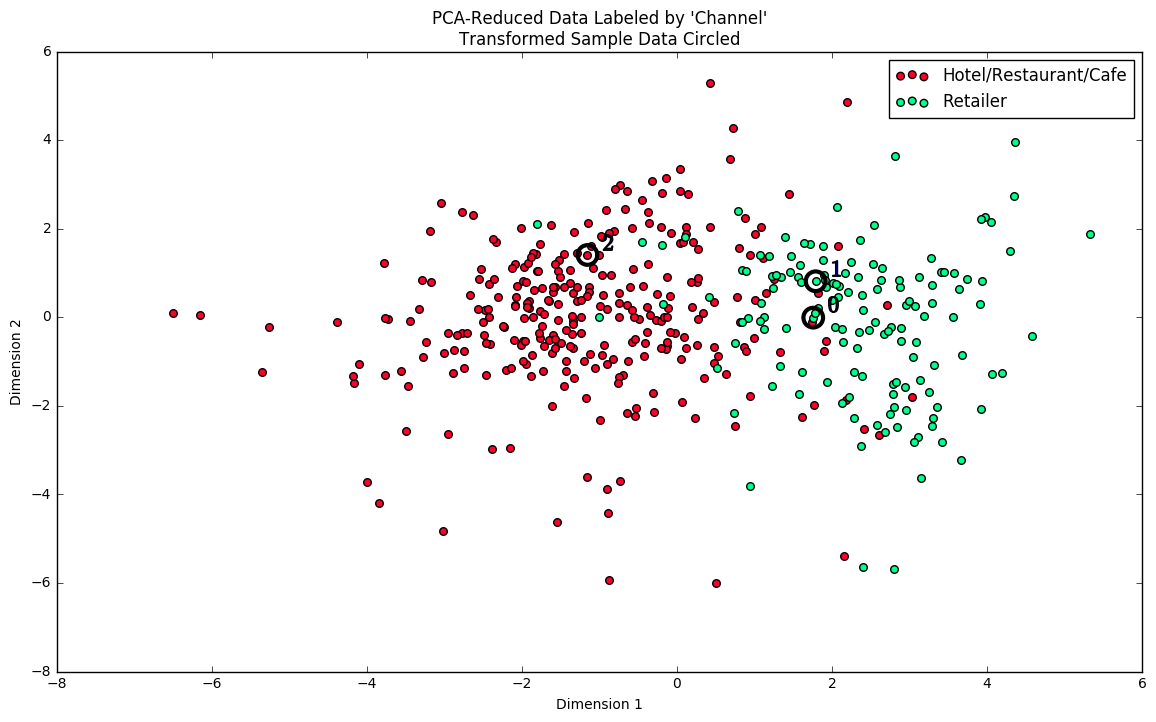

In [99]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, removed_outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** Previous clustering and the number of clusters seems to be very close to what is obtained after the channel feature added. However, it seems my earlier interpretation was quite off the chart. My understanding was that if a place it using Detergents and paper frequently they are serving people in the same place. This was cluster 1 but apparently this was wrong because new segmentation shows that cluster 1 represents retailer stores. My intution says the otherwise, therefore the result is quite inconsistent.

**Updated Answer:** I think I wasn't quite sure about the possible customer categories. Now, I understand why the cluster 0 is more like a hotel/cafe/restaruant and cluster 1 is like a retailer store. I think it is consistent because Detergents_Paper will be a more dominant need in Retailer Stores compared to Restaurants. In addition, Grocery is more common in Retailer stores too. Moreover, things are more fresh in hotel/cafe/restaruant as they are just made. Therefore, this clustering seems to be quite accurate.

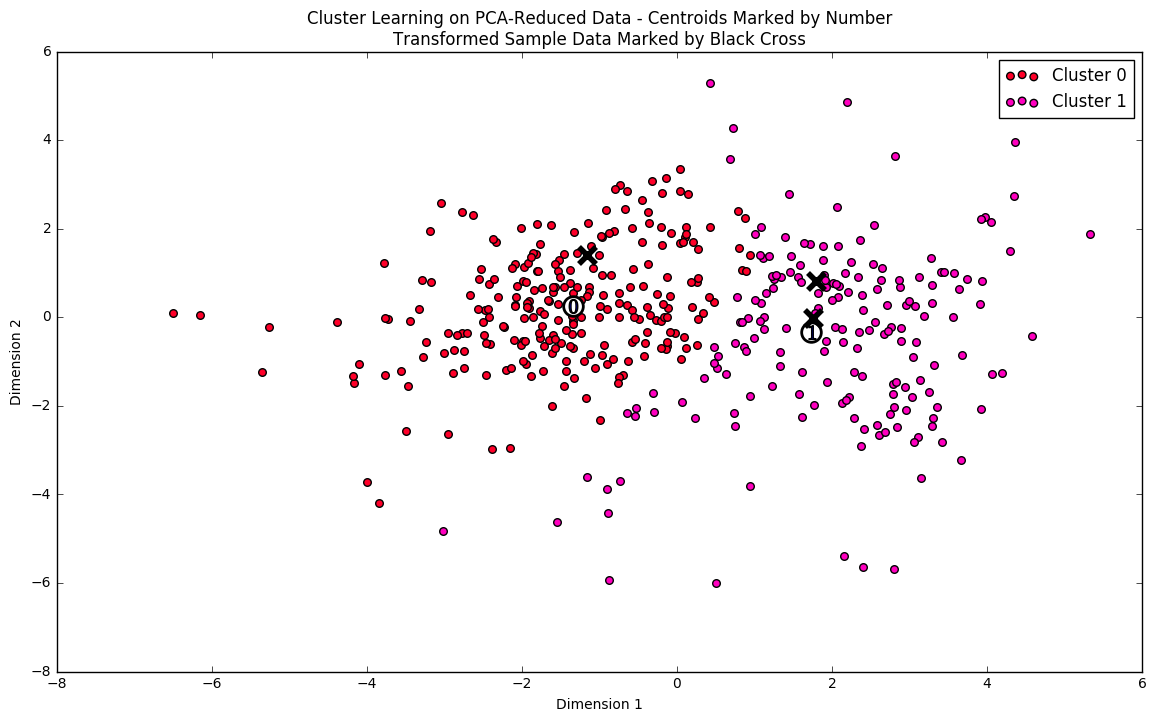

In [101]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.